In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
import seaborn as sns
from sklearn.pipeline import make_pipeline 
%pip install yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "DejaVu Sans"



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
df=pd.read_csv("/workspaces/IT326-PROJECT/Dataset Folder/Processed_dataset.csv")
data = pd.DataFrame(df)

print(df.head())

   Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0   1            6      148             72             35        0  33.6   
1   2            1       85             66             29        0  26.6   
2   3            8      183             64              0        0  23.3   
3   4            1       89             66             23       94  28.1   
4   5            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


<h2 style="color:red; font-family:Time New Roman;">Classification:<br>
-------------------------------------------------------------------------</h2>


<h3 style="color:green; font-family:Time New Roman;">Information Gain(entropy):</h3>

In [6]:
# 1. Load the dataset
df = pd.read_csv('/workspaces/IT326-PROJECT/Dataset Folder/Processed_dataset.csv')

# Define features and target variable
X = df.drop(columns=['Outcome'])  
y = df['Outcome'] 

The model is developed using information gain (entropy) as a key metric, and the dataset is split into two subsets: 70% for training and 30% for testing.

In [7]:
# Split the data: 70% train, 30% test
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X, y, train_size=0.7, random_state=42)

# Train the decision tree classifier using entropy
model_70 = DecisionTreeClassifier(criterion='entropy', random_state=42) 
model_70.fit(X_train_70, y_train_70)

# Make predictions
y_pred_30 = model_70.predict(X_test_30)

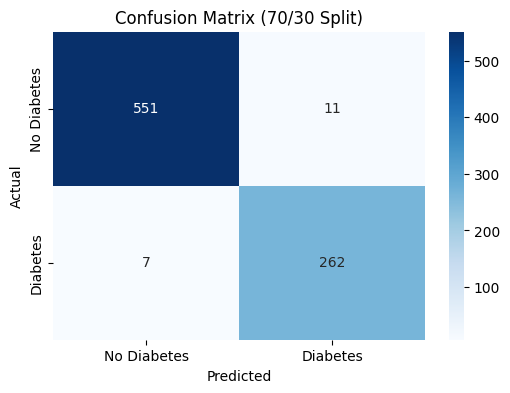

In [15]:
# Calculate the confusion matrix
cm_70 = confusion_matrix(y_test_30, y_pred_30)

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_70, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix (70/30 Split)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The confusion matrix provides a clear evaluation of the binary classification model's performance. 

1. The top-left cell (551) represents the true negative (TN) instances - cases where the actual class was negative, and the model correctly predicted the negative class.

2. The top-right cell (11) represents the false positive (FP) instances - cases where the actual class was negative, but the model incorrectly predicted the positive class.

3. The bottom-left cell (7) represents the false negative (FN) instances - cases where the actual class was positive, but the model incorrectly predicted the negative class.

4. The bottom-right cell (262) represents the true positive (TP) instances - cases where the actual class was positive, and the model correctly predicted the positive class.



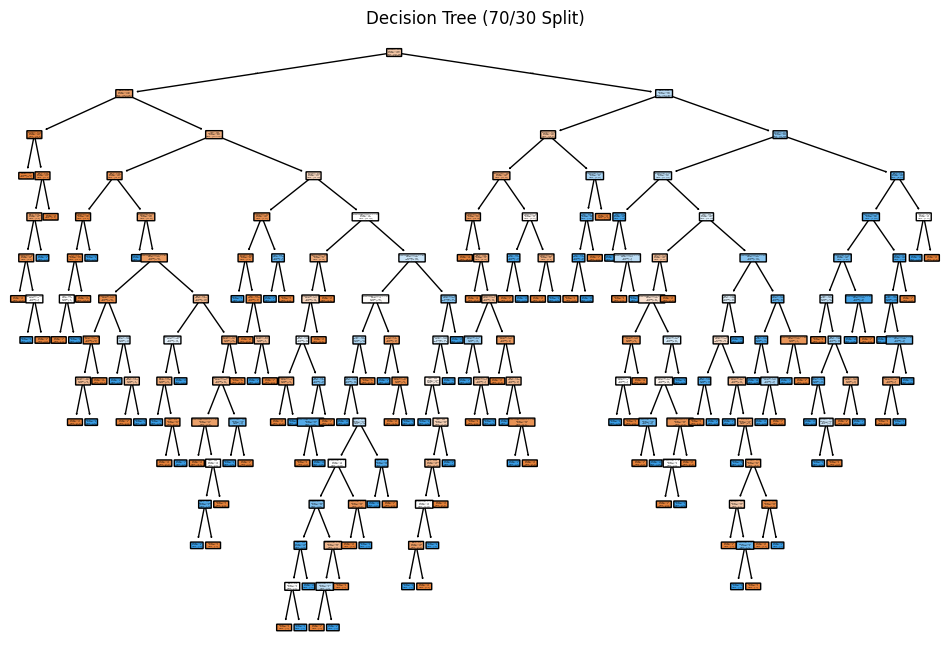

In [36]:
# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(model_70, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], rounded=True)
plt.title('Decision Tree (70/30 Split)')
plt.show()

In [10]:
# Calculate metrics
cm_70 = confusion_matrix(y_test_30, y_pred_30)
print('confusion matrix :\n',cm_70)
accuracy_70 = accuracy_score(y_test_30, y_pred_30)
error_rate_70 = 1 - accuracy_70

# Sensitivity and specificity
TP_70 = cm_70[1, 1]  # True Positive
TN_70 = cm_70[0, 0]  # True Negative
FP_70 = cm_70[0, 1]  # False Positive
FN_70 = cm_70[1, 0]  # False Negative

sensitivity_70 = TP_70 / (TP_70 + FN_70) 
specificity_70 = TN_70 / (TN_70 + FP_70) 
precision_70 = TP_70 / (TP_70 + FP_70)

# Print results
print("\n 70/30 Split")
print(f"Accuracy: {accuracy_70:.2f}")
print(f"Error Rate: {error_rate_70:.2f}")
print(f"Sensitivity: {sensitivity_70:.2f}")
print(f"Specificity: {specificity_70:.2f}")
print(f"Precision: {precision_70:.2f}")


confusion matrix :
 [[551  11]
 [  7 262]]

 70/30 Split
Accuracy: 0.98
Error Rate: 0.02
Sensitivity: 0.97
Specificity: 0.98
Precision: 0.96


The performance metrics for the 70/30 data split provide the following insights:

1. Accuracy: 0.98
   - The accuracy is 98%, meaning the model correctly classified 98% of the instances in the test set.
   - This high accuracy indicates the model is performing exceptionally well, with a low overall rate of misclassifications.

2. Error Rate: 0.02
   - The error rate is 2%, which is the complement of the accuracy.
   - This means the model made incorrect predictions for 2% of the instances in the test set.

3. Sensitivity: 0.97
   - Sensitivity, also known as Recall or True Positive Rate, is 97%.
   - This means the model correctly identified 97% of the positive instances, demonstrating a strong ability to detect the positive class.

4. Specificity: 0.98
   - Specificity is 98%, which means the model correctly identified 98% of the negative instances.
   - The model had a very low rate of false positives, indicating its strong capability to distinguish negative cases.

5. Precision: 0.96
   - Precision is 96%, indicating that 96% of the instances the model predicted as positive were truly positive.
   - This high precision complements the sensitivity, showing the model makes accurate positive predictions.

The performance metrics for the 70/30 data split paint a picture of a highly capable classification model. The high accuracy, low error rate, and well-balanced sensitivity and specificity suggest the model can reliably distinguish between the positive and negative classes.



In [17]:
### Partition 2: 80/20 Split ###

# Split the data: 80% train, 20% test
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(X, y, train_size=0.8, random_state=42)

# Train the decision tree classifier using entropy
model_80 = DecisionTreeClassifier(criterion='entropy', random_state=42)
model_80.fit(X_train_80, y_train_80)

# Make predictions
y_pred_20 = model_80.predict(X_test_20)

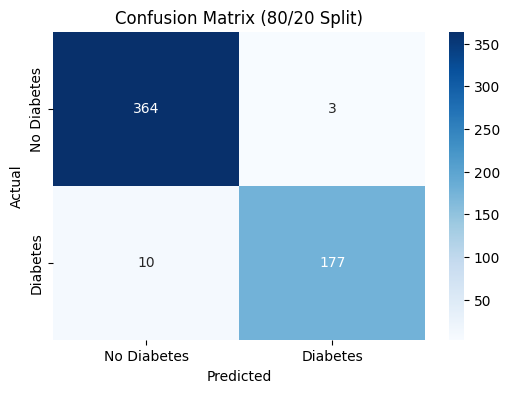

In [18]:
# Calculate the confusion matrix
cm_80 = confusion_matrix(y_test_20, y_pred_20)

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_80, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix (80/20 Split)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



The confusion matrix provides a clear evaluation of the binary classification model's performance. 

1. The top-left cell (364) represents the true negative (TN) instances - cases where the actual class was negative, and the model correctly predicted the negative class.

2. The top-right cell (3) represents the false positive (FP) instances - cases where the actual class was negative, but the model incorrectly predicted the positive class.

3. The bottom-left cell (10) represents the false negative (FN) instances - cases where the actual class was positive, but the model incorrectly predicted the negative class.

4. The bottom-right cell (177) represents the true positive (TP) instances - cases where the actual class was positive, and the model correctly predicted the positive class.



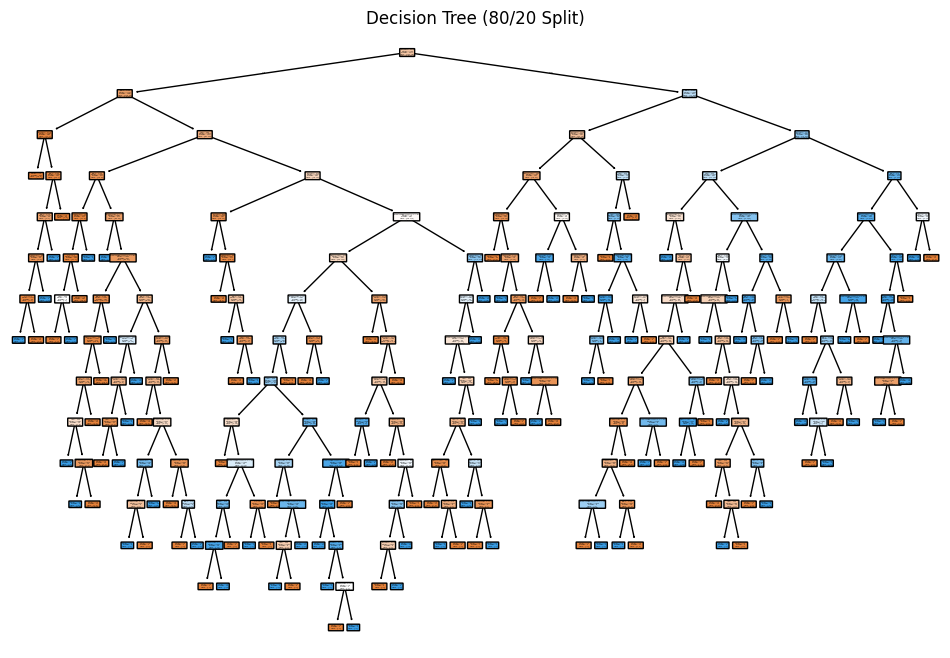

In [43]:
# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(model_80, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], rounded=True)
plt.title('Decision Tree (80/20 Split)')
plt.show()

In [46]:
cm_80 = confusion_matrix(y_test_20, y_pred_20)
print('confusion matrix :\n',cm_80)
accuracy_80 = accuracy_score(y_test_20, y_pred_20)
error_rate_80 = 1 - accuracy_80
cm_80 = confusion_matrix(y_test_20, y_pred_20)

# Sensitivity and specificity
TP_80 = cm_80[1, 1]  # True Positive
TN_80 = cm_80[0, 0]  # True Negative
FP_80 = cm_80[0, 1]  # False Positive
FN_80 = cm_80[1, 0]  # False Negative

sensitivity_80 = TP_80 / (TP_80 + FN_80) 
specificity_80 = TN_80 / (TN_80 + FP_80) 
precision_80 = TP_80 / (TP_80 + FP_80) 

# Print results
print("\n80/20 Split")
print(f"Accuracy: {accuracy_80:.2f}")
print(f"Error Rate: {error_rate_80:.2f}")
print(f"Sensitivity: {sensitivity_80:.2f}")
print(f"Specificity: {specificity_80:.2f}")
print(f"Precision: {precision_80:.2f}")

confusion matrix :
 [[364   3]
 [ 10 177]]

80/20 Split
Accuracy: 0.98
Error Rate: 0.02
Sensitivity: 0.95
Specificity: 0.99
Precision: 0.98


The performance metrics provided for the 80/20 data split give us a comprehensive understanding of the model's capabilities:

1. Accuracy: 0.98
   - The accuracy is 98%, meaning the model correctly classified 98% of the instances in the test set.
   - This indicates the model has a very high overall performance, with a low rate of misclassifications.

2. Error Rate: 0.02
   - The error rate is 2%, which is the complement of the accuracy.
   - This means the model made incorrect predictions for 2% of the instances in the test set.

3. Sensitivity: 0.95
   - Sensitivity, also known as Recall or True Positive Rate, is 95%.
   - This means the model correctly identified 95% of the positive instances, i.e., it had a low rate of false negatives.

4. Specificity: 0.99
   - Specificity is 99%, which means the model correctly identified 99% of the negative instances.
   - The model had a very low rate of false positives, demonstrating its strong ability to distinguish negative cases.

5. Precision: 0.98
   - Precision is 98%, indicating that 98% of the instances the model predicted as positive were truly positive.
   - This metric complements the sensitivity, showing the model's ability to make accurate positive predictions.

Overall, the performance metrics for the 80/20 data split indicate that the model is highly effective, with a strong ability to correctly classify both positive and negative instances. The high accuracy, low error rate, and balanced sensitivity and specificity suggest the model can be trusted to make reliable predictions on new, unseen data.



In [20]:
### Partition 3: 90/10 Split ###

# Split the data: 90% train, 10% test
X_train_90, X_test_10, y_train_90, y_test_10 = train_test_split(X, y, train_size=0.9, random_state=42)

# Train the decision tree classifier using entropy
model_90 = DecisionTreeClassifier(criterion='entropy', random_state=42)
model_90.fit(X_train_90, y_train_90)

# Make predictions
y_pred_10 = model_90.predict(X_test_10)


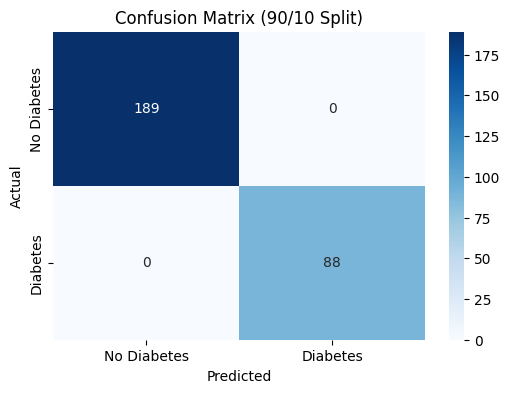

In [21]:
# Calculate the confusion matrix
cm_90 = confusion_matrix(y_test_10, y_pred_10)

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_90, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix (90/10 Split)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The confusion matrix provides a clear evaluation of the binary classification model's performance. 

1. The top-left cell (189) represents the true negative (TN) instances - cases where the actual class was negative, and the model correctly predicted the negative class.

2. The top-right cell (0) represents the absence of false positive (FP) instances - the model did not incorrectly predict any negative cases as positive.

3. The bottom-left cell (0) represents the absence of false negative (FN) instances - the model did not fail to predict any positive cases as negative.

4. The bottom-right cell (88) represents the true positive (TP) instances - cases where the actual class was positive, and the model correctly predicted the positive class.

The model performed extremely well, with no false positives or false negatives.
Out of the total 277 instances (189 negatives + 88 positives), the model correctly classified 277 instances, indicating a perfect accuracy of 100%.
The model's ability to correctly identify both negative and positive instances is excellent, as shown by the high true negative and true positive counts.
This confusion matrix suggests that the classification model trained on the 90/10 data split is highly effective and accurate in predicting the target variable. The model was able to correctly classify all instances, demonstrating its strong performance on the test set.

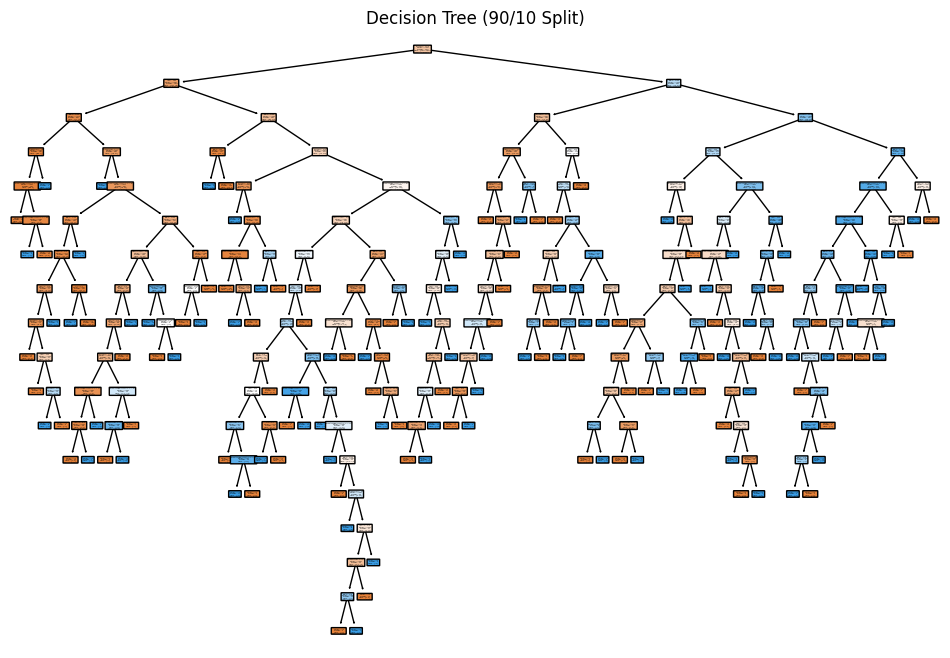

In [49]:
# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(model_90, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], rounded=True)
plt.title('Decision Tree (90/10 Split)')
plt.show()

In [50]:
accuracy_90 = accuracy_score(y_test_10, y_pred_10)
error_rate_90 = 1 - accuracy_90
cm_90 = confusion_matrix(y_test_10, y_pred_10)
print("confusion matrix: \n",cm_90)

# Sensitivity and specificity
TP_90 = cm_90[1, 1]  # True Positive
TN_90 = cm_90[0, 0]  # True Negative
FP_90 = cm_90[0, 1]  # False Positive
FN_90 = cm_90[1, 0]  # False Negative

sensitivity_90 = TP_90 / (TP_90 + FN_90) if (TP_90 + FN_90) != 0 else 0
specificity_90 = TN_90 / (TN_90 + FP_90) if (TN_90 + FP_90) != 0 else 0
precision_90 = TP_90 / (TP_90 + FP_90) if (TP_90 + FP_90) != 0 else 0

# Print results
print("\n90/10 Split")
print(f"Accuracy: {accuracy_90:.2f}")
print(f"Error Rate: {error_rate_90:.2f}")
print(f"Sensitivity: {sensitivity_90:.2f}")
print(f"Specificity: {specificity_90:.2f}")
print(f"Precision: {precision_90:.2f}")


confusion matrix: 
 [[189   0]
 [  0  88]]

90/10 Split
Accuracy: 1.00
Error Rate: 0.00
Sensitivity: 1.00
Specificity: 1.00
Precision: 1.00



1. Accuracy: 1.00
   - The accuracy is 100%, indicating that the model correctly classified all instances in the test set.
   - This means the model made no mistakes in its predictions - all negative cases were correctly identified as negative, and all positive cases were correctly identified as positive.

2. Error Rate: 0.00
   - The error rate is 0%, which complements the 100% accuracy.
   - This means the model did not make any misclassifications, i.e., there were no false positives or false negatives.

3. Sensitivity: 1.00
   - Sensitivity, also known as Recall or True Positive Rate, is 100%.
   - This means the model correctly identified all positive instances,it did not miss any positive cases.

4. Specificity: 1.00
   - Specificity is 100%, which means the model correctly identified all negative instances.
   - The model did not incorrectly classify any negative cases as positive.

5. Precision: 1.00
   - Precision is 100%, indicating that all instances the model predicted as positive were truly positive.
   - There were no false positives, so the model's positive predictions were completely accurate.

The combination of these metrics, all at 100%, suggests that the classification model achieved perfect performance on the 90/10 data split. It correctly identified all positive and negative instances, with no mistakes in its predictions.




<p style="font-family:Time New Roman;">Example</p>

<h2 style="color:red;font-family:Time New Roman;">Clustering:<br>
-------------------------------------------------------------------------</h2>

In order to determine the three sizes to be used in K-means clustering, we will rely on validation methods to assist us in making an informed decision. Once the sizes are determined, we will proceed with the clustering process. Our primary goal is to ensure a wide range of size selections, encompassing a relatively large size, a moderate size, and a small size. By adopting this approach, we aim to cover a diverse array of potential cluster configurations.

-------------------------------------------------------------------

Remove class lable

In [5]:

features = df.drop(['Outcome'], axis=1)


scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


df_scaled = pd.DataFrame(scaled_features, columns=features.columns)


print(df_scaled.head())


         Id  Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin  \
0 -1.731425     0.679232  0.839738       0.149033       0.882845 -0.713633   
1 -1.730174    -0.825341 -1.127124      -0.163012       0.509169 -0.713633   
2 -1.728922     1.281062  1.932439      -0.267027      -1.296931 -0.713633   
3 -1.727671    -0.825341 -1.002244      -0.163012       0.135494  0.123547   
4 -1.726419    -1.126256  0.496317      -1.515209       0.882845  0.782604   

        BMI  DiabetesPedigreeFunction       Age  
0  0.181135                  0.478509  1.432495  
1 -0.685773                 -0.369130 -0.181079  
2 -1.094459                  0.616712 -0.096154  
3 -0.500007                 -0.934224 -1.030329  
4  1.357654                  5.579704 -0.011229  


k-means clustering, visualization, and evaluation:

Two Clusters

In [6]:
np.random.seed(56)

kmeans = KMeans(n_clusters = 2, random_state=56)
kmeans_result = kmeans.fit(df_scaled)

print("Cluster center:")
print(kmeans_result.cluster_centers_)

Cluster center:
[[ 1.22789065e-02 -5.15571198e-01 -2.13180001e-01 -2.17878634e-01
   1.12048000e-01  7.62819084e-02 -5.13077847e-02  5.76721997e-04
  -5.67603199e-01]
 [-2.28689871e-02  9.60231363e-01  3.97039485e-01  4.05790507e-01
  -2.08685055e-01 -1.42072096e-01  9.55587592e-02 -1.07412236e-03
   1.05713895e+00]]


visualize Silhouette score for Kmeans model with two clusters

/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


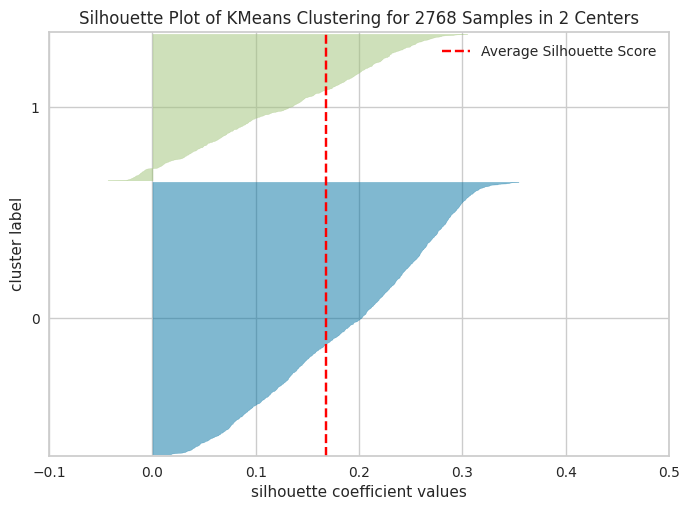

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2768 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [7]:

visualizer = SilhouetteVisualizer(kmeans , colors = 'yellowbrick')
visualizer.fit(df_scaled)
visualizer.show()

 Total within-cluster sum of squares

In [8]:

wss = kmeans.inertia_
print("Total within-cluster sum of squares (WSS):", wss)

Total within-cluster sum of squares (WSS): 21292.65560464536


Three Clusters

In [9]:
np.random.seed(56)
kmeans = KMeans(n_clusters = 3, random_state =56)
kmeans_result = kmeans.fit(df_scaled)

print("cluster center:")
print(kmeans_result.cluster_centers_)

cluster center:
[[ 0.06123276 -0.33577615  0.57016461  0.21510961  0.87949185  0.99476548
   0.64583657  0.37715328 -0.21210941]
 [-0.03412324  1.09843499  0.29033968  0.4135606  -0.37829019 -0.40437703
   0.05168297 -0.04984004  1.16926142]
 [-0.01786782 -0.4576649  -0.53712889 -0.38801346 -0.32481873 -0.38171754
  -0.43940875 -0.20781377 -0.57895426]]


/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


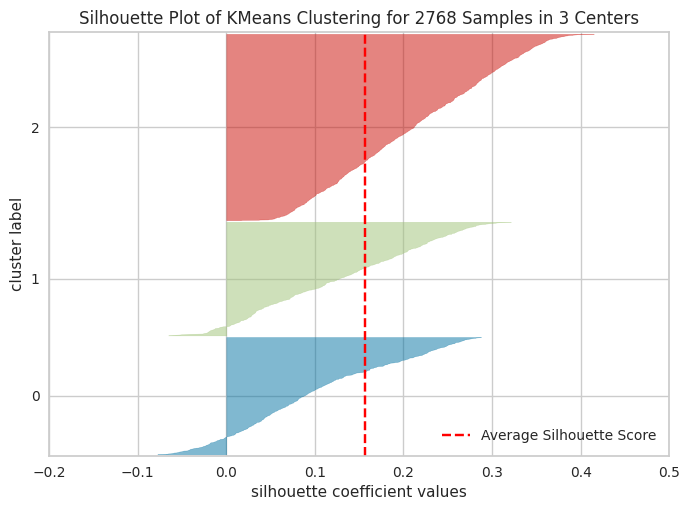

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2768 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [10]:
visualizer = SilhouetteVisualizer(kmeans , colors = 'yellowbrick')
visualizer.fit(df_scaled)
visualizer.show()

 Total within-cluster sum of squares

In [11]:

wss = kmeans.inertia_
print("Total within-cluster sum of squares (WSS):", wss)

Total within-cluster sum of squares (WSS): 18501.632107238118


Four Clusters

In [12]:
np.random.seed(56)
kmeans = KMeans(n_clusters = 4, random_state =56 )
kmeans_result = kmeans.fit(df_scaled)

print("cluster center:")
print(kmeans_result.cluster_centers_)

cluster center:
[[ 0.04963583 -0.48243142 -0.38928462  0.12235069  0.47565365 -0.04133305
   0.22123554 -0.00489285 -0.49775712]
 [ 0.03035585 -0.03169649  1.0929009   0.27276699  0.92092133  1.65633817
   0.73303401  0.60494361  0.08939274]
 [-0.05354412 -0.43113819 -0.45308927 -0.88227135 -0.81236009 -0.48927953
  -0.86679435 -0.30203855 -0.55588306]
 [-0.03962303  1.06111447  0.2933654   0.44102596 -0.48738605 -0.48550647
   0.0215294  -0.08381509  1.12023967]]


/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


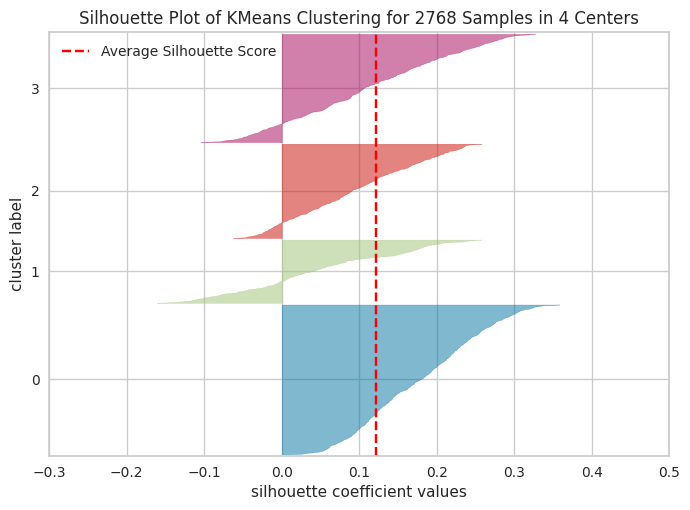

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2768 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [13]:
visualizer = SilhouetteVisualizer(kmeans , colors = 'yellowbrick')
visualizer.fit(df_scaled)
visualizer.show()

Total within-cluster sum of squares

In [14]:

wss = kmeans.inertia_
print("Total within-cluster sum of squares (WSS):", wss)

Total within-cluster sum of squares (WSS): 17258.692905858836
